In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import urllib.request
import zipfile
import os
import matplotlib.pyplot as plt
print("Semua library berhasil diimport!")

Semua library berhasil diimport!


In [2]:
def download_and_extract_data():
    train_url = 'https://github.com/dicodingacademy/assets/releases/download/release-horse-or-human/horse-or-human.zip'
    urllib.request.urlretrieve(train_url, 'horse-or-human.zip')
    with zipfile.ZipFile('horse-or-human.zip', 'r') as zip_ref:
        zip_ref.extractall('data/horse-or-human')

    val_url = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/validation-horse-or-human.zip'
    urllib.request.urlretrieve(val_url, 'validation-horse-or-human.zip')
    with zipfile.ZipFile('validation-horse-or-human.zip', 'r') as zip_ref:
        zip_ref.extractall('data/validation-horse-or-human')

download_and_extract_data()
print("Dataset berhasil didownload dan diekstrak!")

Dataset berhasil didownload dan diekstrak!


In [3]:
TRAINING_DIR = 'data/horse-or-human'
VALIDATION_DIR = 'data/validation-horse-or-human'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

print("Data generator berhasil dibuat!")
print(f"Jumlah kelas training: {train_generator.num_classes}")
print(f"Contoh shape input: {train_generator.image_shape}")

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Data generator berhasil dibuat!
Jumlah kelas training: 2
Contoh shape input: (150, 150, 3)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,309,729 (12.63 MB)

 Trainable params: 3,309,729 (12.63 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    verbose=1
)

print("Training selesai!")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5127 - loss: 0.8113 - val_accuracy: 0.5000 - val_loss: 1.4653
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5431 - loss: 0.8402 - val_accuracy: 0.5625 - val_loss: 0.6510
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6825 - loss: 0.5988 - val_accuracy: 0.5156 - val_loss: 0.8140
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7446 - loss: 0.5028 - val_accuracy: 0.5430 - val_loss: 1.4214
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7970 - loss: 0.4468 - val_accuracy: 0.5352 - val_loss: 1.2788
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7874 - loss: 0.4246 - val_accuracy: 0.5508 - val_loss: 1.3925
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8361 - loss: 0.3574 - val_accuracy: 0.5742 - val_loss: 1.9612
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8361 - loss: 0.3665 - val_accuracy: 0.5391 - val_loss:

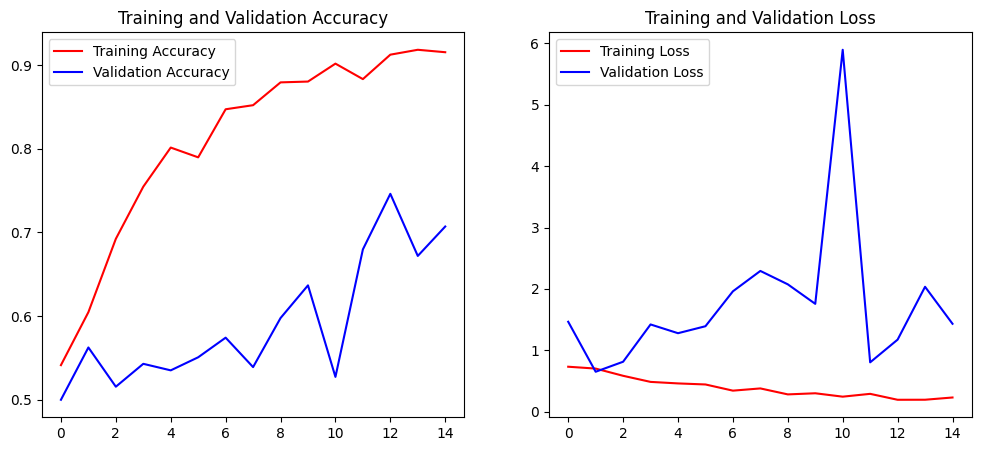

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [7]:
final_train_acc = history.history['accuracy'][-1]

final_val_acc = history.history['val_accuracy'][-1]

print(f'\nFinal Training Accuracy: {final_train_acc*100:.2f}%')
print(f'Final Validation Accuracy: {final_val_acc*100:.2f}%')

if final_val_acc > 0.83 and final_train_acc > 0.83:
    print("Model mencapai target validation accuracy > 83%!")
else:
    print("Model belum mencapai target. Coba:")
    print("- Tingkatkan jumlah epoch (misal: 20-25)")
    print("- Tambahkan layer Conv2D/Dense")
    print("- Atur learning rate (contoh: 0.0001)")


Final Training Accuracy: 91.53%
Final Validation Accuracy: 70.70%
Model belum mencapai target. Coba:
- Tingkatkan jumlah epoch (misal: 20-25)
- Tambahkan layer Conv2D/Dense
- Atur learning rate (contoh: 0.0001)


In [8]:
model.save('horse_human_classifier.h5')
print("Model berhasil disimpan sebagai horse_human_classifier.h5")

Model berhasil disimpan sebagai horse_human_classifier.h5
